In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from collections import Counter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.5/792.5 kB 15.7 MB/s eta 0:00:0000:01


Move dataset to working directory

In [3]:
import shutil
os.mkdir("/kaggle/working/datasets")
src_img_path = r"/kaggle/input/cell-image-library-for-ultralytics-yolo/images"
src_label_path = r"/kaggle/input/cell-image-library-for-ultralytics-yolo/labels"
dst_path = r"/kaggle/working/datasets/"

try:
    shutil.move(src_img_path, dst_path,)
except:
    pass

try:
    shutil.move(src_label_path, dst_path)
except:
    pass

print(len(os.listdir("/kaggle/working/datasets/images/train/")))
print(len(os.listdir("/kaggle/working/datasets/images/val/")))
print(len(os.listdir("/kaggle/working/datasets/images/test/")))
print(len(os.listdir("/kaggle/working/datasets/labels/train/")))
print(len(os.listdir("/kaggle/working/datasets/labels/val/")))
print(len(os.listdir("/kaggle/working/datasets/images/test/")))

3744
1000
250
3744
1000
250


disable wandb during training process

In [4]:
os.environ['WANDB_DISABLED'] = 'true'

In [5]:
from ultralytics import YOLO

model = YOLO("/kaggle/input/yolov8-chromosome-detection/pytorch/sometuning/2/bestv3.pt")

In [6]:
val_res = model.val(data='/kaggle/input/cell-image-library-for-ultralytics-yolo/CIL.yml', split="test", conf=0.5, iou=0.8)

Ultralytics YOLOv8.2.38 🚀 Python-3.10.13 torch-2.1.2+cpu CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3010328 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]
val: Scanning /kaggle/working/datasets/labels/test... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<00:00, 586.38it/s]

val: New cache created: /kaggle/working/datasets/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [02:23<00:00,  8.99s/it]


                   all        250      11510      0.956      0.927       0.96      0.811
                    A1        250        500      0.936      0.978      0.986      0.857
                    A2        250        500      0.962       0.97      0.983       0.88
                    A3        250        500      0.939      0.978      0.986      0.871
                    B4        250        500      0.946      0.942      0.967      0.863
                    B5        250        500      0.946      0.938      0.966      0.863
                   C10        250        500      0.956      0.912      0.951      0.824
                   C11        250        501      0.964      0.938      0.964      0.828
                   C12        250        500      0.969      0.926      0.963      0.819
                    C6        250        500      0.963      0.927      0.962      0.844
                    C7        250        500      0.957      0.942      0.968      0.842
                    C

In [7]:
val_res.mean_results()

[0.9561685335487601, 0.927444488378026, 0.9598121341888444, 0.8109028743956369]

Precision, Recall, mAP50, mAP50-95

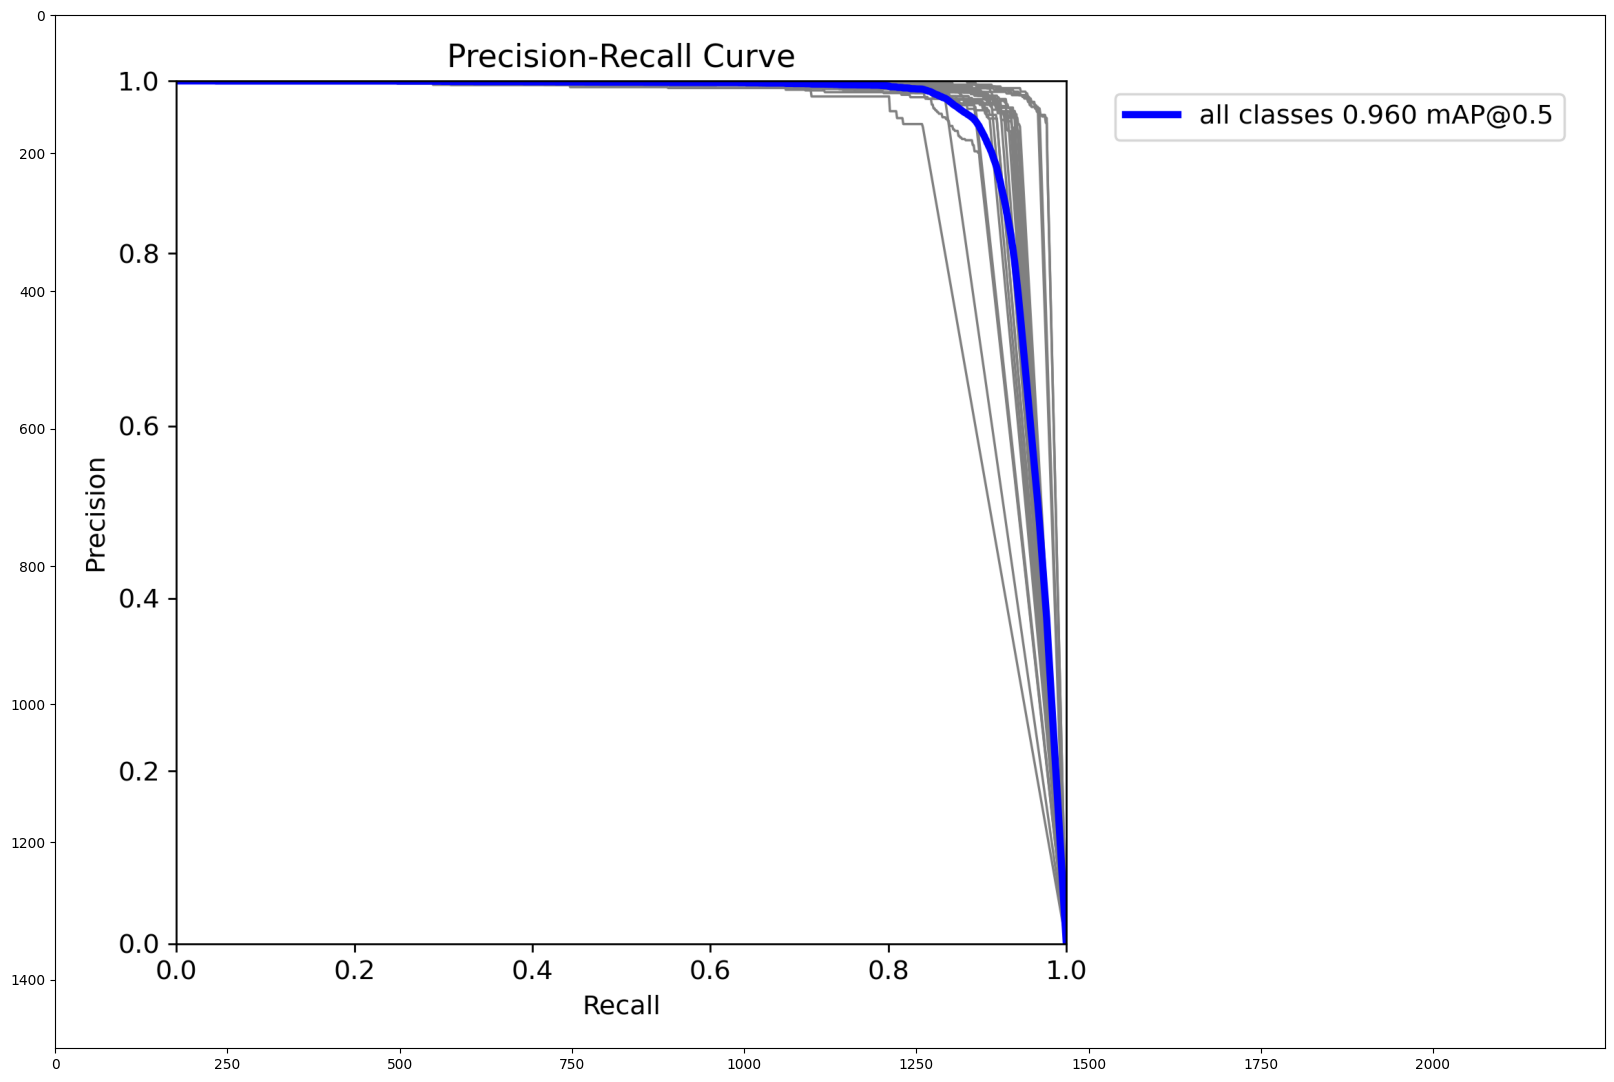

In [8]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(mpimg.imread("/kaggle/working/runs/detect/val/PR_curve.png"))

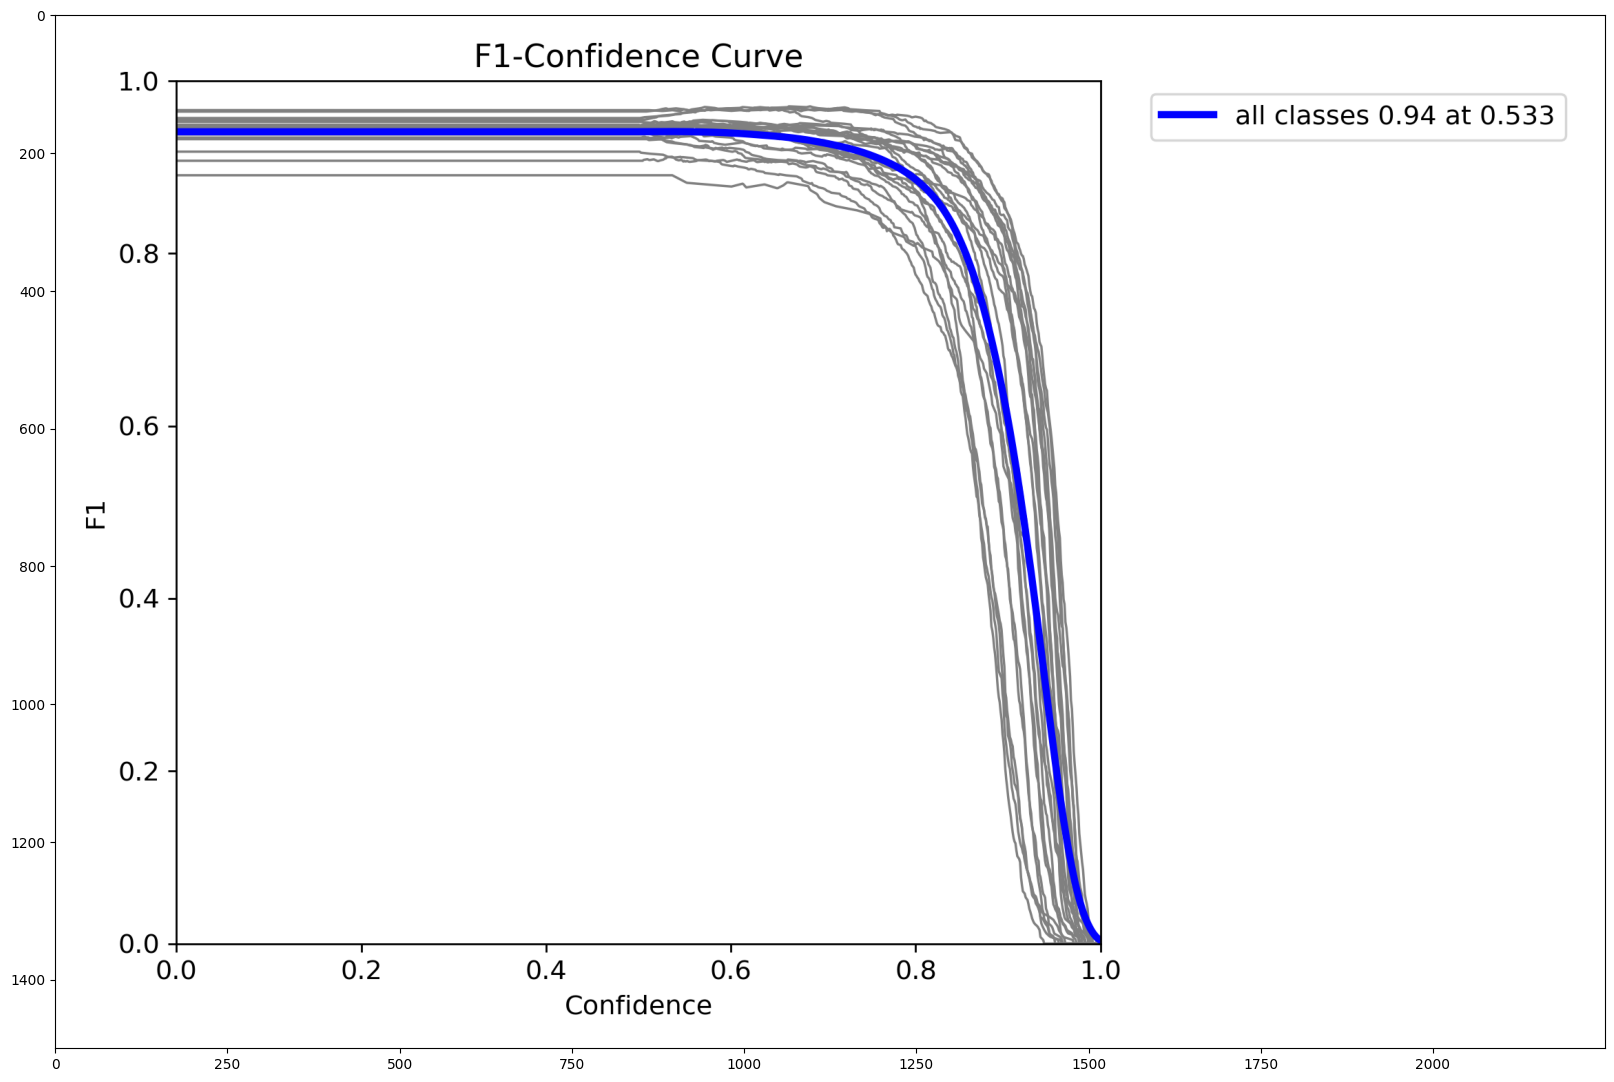

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(mpimg.imread("/kaggle/working/runs/detect/val/F1_curve.png"))

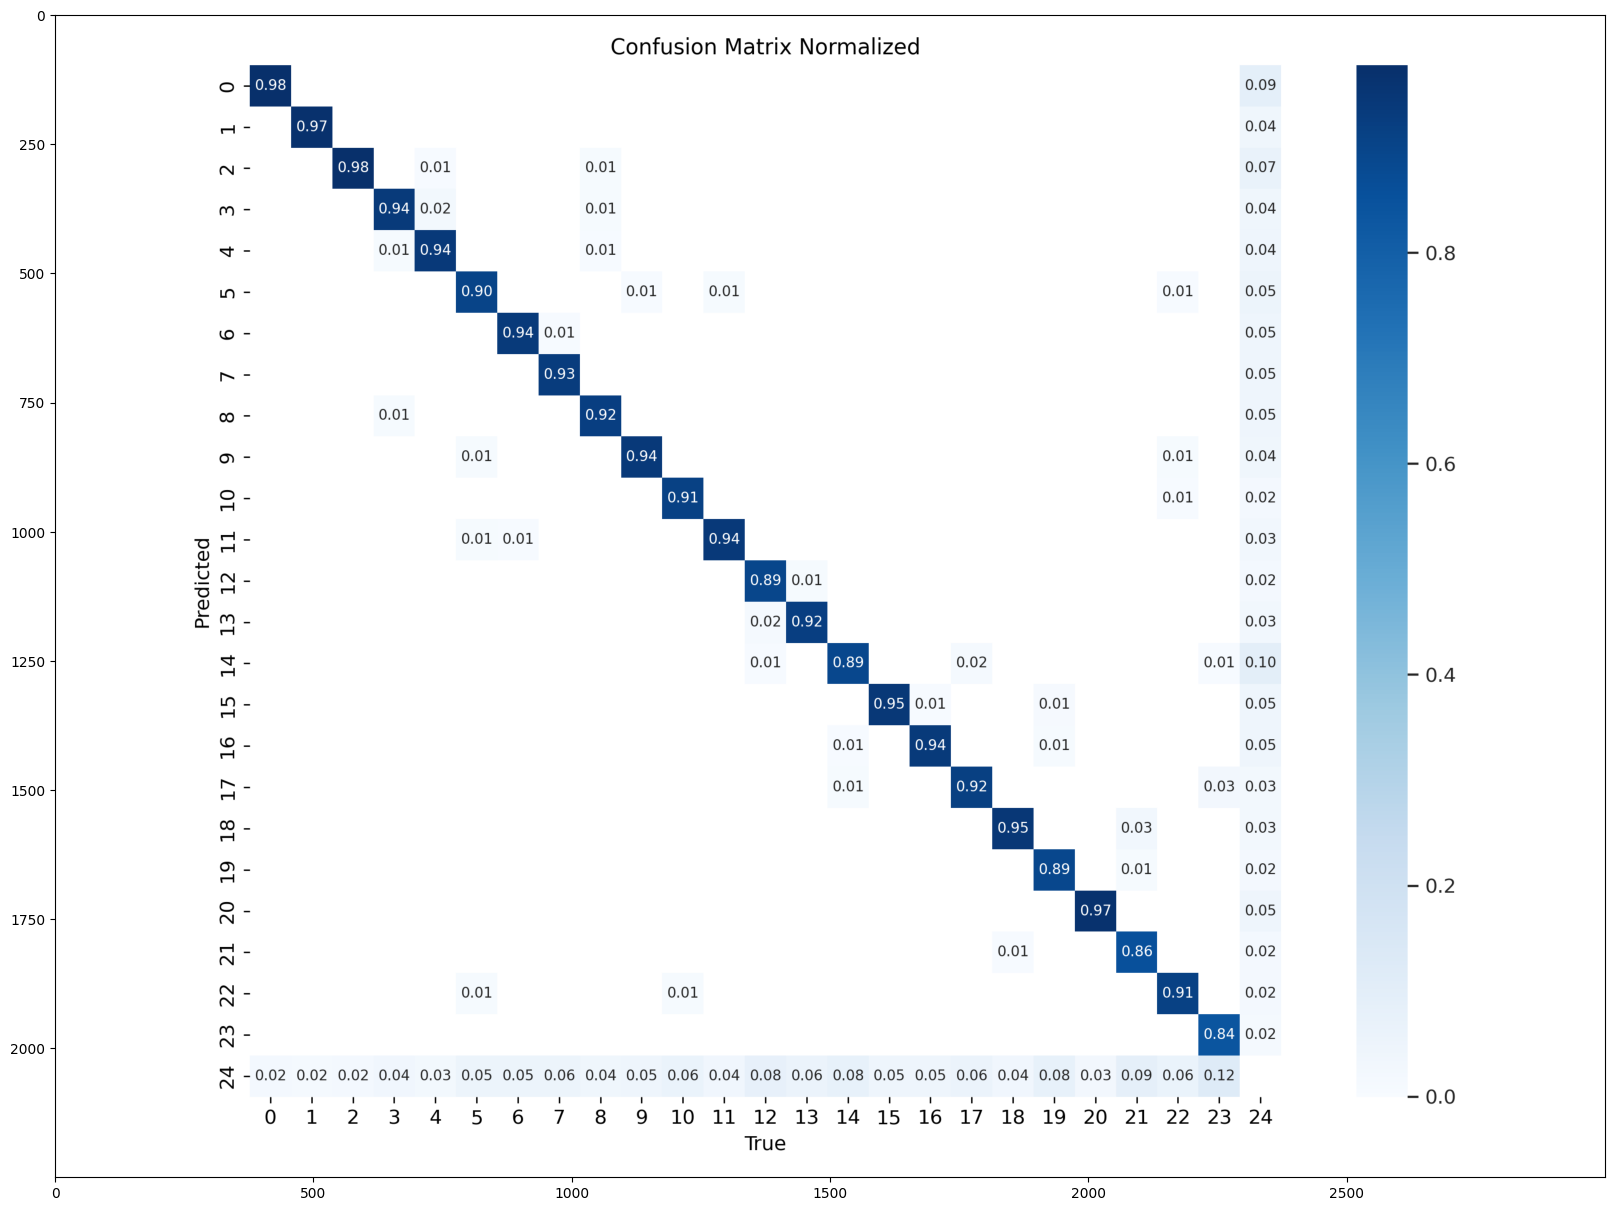

In [10]:
val_res.confusion_matrix.plot()
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(mpimg.imread("/kaggle/working/confusion_matrix_normalized.png"))
count = np.sum(val_res.confusion_matrix.matrix, axis=0)

In [11]:
test_files = [os.path.join("/kaggle/working/datasets/images/test", i) for i in os.listdir("/kaggle/working/datasets/images/test")[:3]]

In [12]:
preds = model(test_files, conf=0.5, iou=0.7)


0: 800x800 2 A1s, 2 A2s, 2 A3s, 2 B4s, 2 B5s, 2 C10s, 2 C11s, 2 C12s, 2 C6s, 2 C7s, 2 C8s, 2 C9s, 2 D13s, 2 D14s, 2 D15s, 2 E16s, 2 E17s, 2 E18s, 2 F19s, 2 F20s, 2 G21s, 1 G22, 2 Xs, 367.8ms
1: 800x800 2 A1s, 2 A2s, 2 A3s, 2 B4s, 2 B5s, 1 C10, 2 C11s, 2 C12s, 2 C6s, 2 C7s, 2 C8s, 2 C9s, 2 D13s, 1 D14, 2 D15s, 2 E16s, 2 E17s, 2 E18s, 2 F19s, 1 F20, 2 G21s, 2 G22s, 1 Y, 367.8ms
2: 800x800 2 A1s, 2 A2s, 2 A3s, 2 B4s, 3 B5s, 3 C10s, 2 C11s, 2 C12s, 2 C6s, 2 C7s, 2 C8s, 2 C9s, 2 D13s, 2 D14s, 2 D15s, 2 E16s, 2 E17s, 2 E18s, 2 F19s, 2 F20s, 2 G21s, 2 G22s, 1 Y, 367.8ms
Speed: 7.2ms preprocess, 367.8ms inference, 1.9ms postprocess per image at shape (1, 3, 800, 800)


In [13]:
def mismatch(c1, c2):
    c1Counter = Counter(c1)
    c2Counter = Counter(c2)
    total = 0
    id2c = {0: 'A1', 1: 'A2', 2: 'A3', 3: 'B4', 4: 'B5', 5: 'C10', 6: 'C11', 7: 'C12', 8: 'C6', 9: 'C7', 10: 'C8', 11: 'C9', 12: 'D13', 13: 'D14', 14: 'D15', 15: 'E16', 16: 'E17', 17: 'E18', 18: 'F19', 19: 'F20', 20: 'G21', 21: 'G22', 22: 'X', 23: 'Y'}
    diff = []
    for k, v in c1Counter.items():
        total += abs(c1Counter[k]-c2Counter[k])
        if abs(c1Counter[k]-c2Counter[k]) > 0:
            print("Class "+id2c[k]+":\nOriginal: "+str(c1Counter[k])+"\nPredicted: "+str(c2Counter[k]))
    return total

Class G22:
Original: 2
Predicted: 1
Mismatch :  1


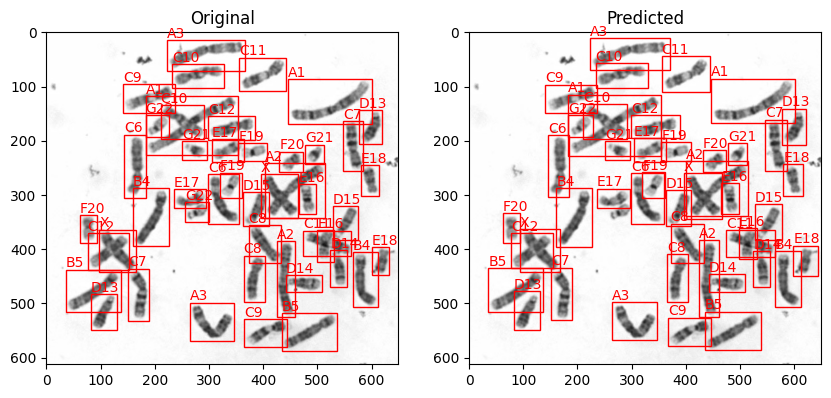

Class C10:
Original: 2
Predicted: 1
Class D14:
Original: 2
Predicted: 1
Class F20:
Original: 2
Predicted: 1
Class X:
Original: 1
Predicted: 0
Mismatch :  4


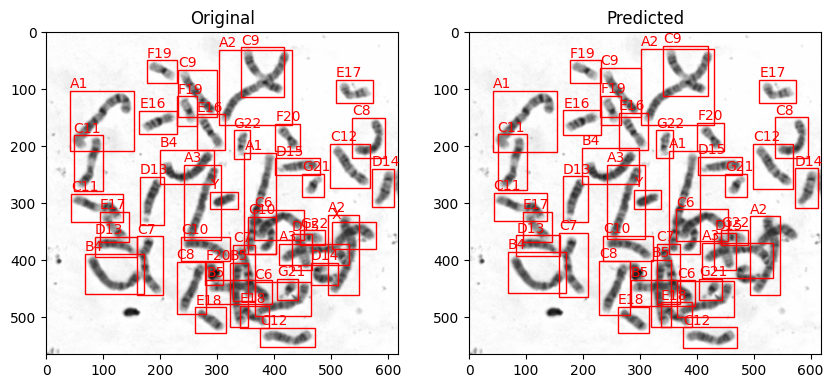

Class B5:
Original: 2
Predicted: 3
Class C10:
Original: 2
Predicted: 3
Class X:
Original: 1
Predicted: 0
Mismatch :  3


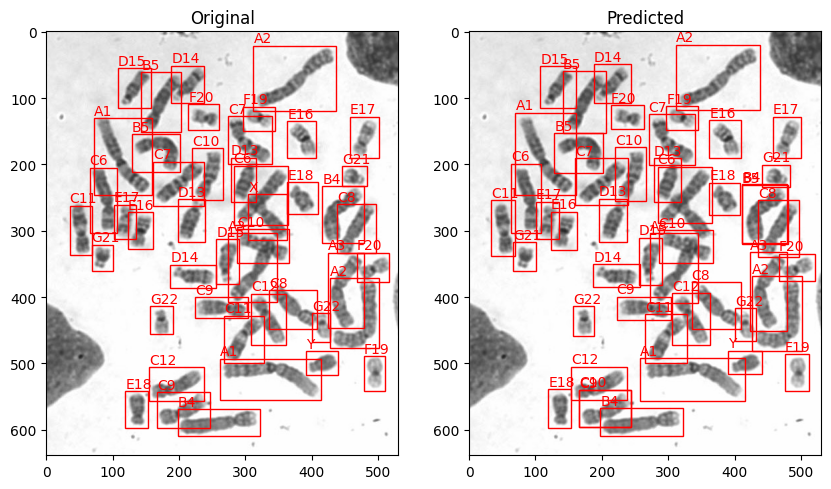

In [14]:
for pred in preds:
    fig, ax = plt.subplots(1,2,figsize=(10,10))

    img = mpimg.imread(pred.path)
    ax[0].imshow(img)
    ax[1].imshow(img)

    id2c = {0: 'A1', 1: 'A2', 2: 'A3', 3: 'B4', 4: 'B5', 5: 'C10', 6: 'C11', 7: 'C12', 8: 'C6', 9: 'C7', 10: 'C8', 11: 'C9', 12: 'D13', 13: 'D14', 14: 'D15', 15: 'E16', 16: 'E17', 17: 'E18', 18: 'F19', 19: 'F20', 20: 'G21', 21: 'G22', 22: 'X', 23: 'Y'}

    
    #original bounding boxes
    w = img.shape[1]
    h = img.shape[0]
    f = open(pred.path.replace("images", "labels").replace(".jpg", ".txt"))
    c_ori = []
    for l in f:
        t = l.split(' ')
        x1 = float(t[1])
        w0 = float(t[3])
        y1 = float(t[2])
        h0 = float(t[4])
        c_ori.append(int(t[0]))
        ax[0].annotate(id2c[int(t[0])], ((x1-(w0/2))*w, ((y1 - (h0/2))*h)-5), color='red')
        ax[0].add_patch(patches.Rectangle(((x1-(w0/2))*w,(y1 - (h0/2))*h),w0*w,h0*h, linewidth=1, edgecolor='red', fill=False,))
        ax[0].set_title("Original")
    f.close()
    
    #predicted bounding boxes
    boxes = pred.boxes.xyxy.numpy()
    classes = pred.boxes.cls.numpy()
    for idx, box in enumerate(boxes):
        ax[1].annotate(id2c[int(classes[idx])], (box[0], box[1]-5), color="red")
        ax[1].add_patch(patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='red', fill=False))
        ax[1].set_title("Predicted")
    print("Mismatch : ", mismatch(c_ori, classes))
    plt.show()

Diagnosis

In [15]:
def diagnose(l):
    total = len(l)
    d = Counter(l)
    if(total >= 47 and d[12]>2):
        print("Trisomy 13")
    elif(total >= 47 and d[17]>2):
        print("Trisomy 18")
    elif(total >= 47 and d[20]>2):
        print("Trisomy 21")
    elif(total >= 47 and d[23]>=1 and d[22]>=2):
        print("Trisomy XXY")
    elif(total == 45 and d[22]==1 and d[23]==0):
        print("Monosomy X")
    else:
        print("Normal")

In [16]:
for pred in preds:
    
    print("Original")
    f = open(pred.path.replace("images", "labels").replace(".jpg", ".txt"))
    classes = []
    for l in f:
        t = l.split(' ')
        classes.append(int(t[0]))
    f.close()
    diagnose(classes)
    
    classes = pred.boxes.cls.numpy()
    print("Predicted")
    diagnose(classes)
    
    print("\n")
    

Original
Normal
Predicted
Normal


Original
Normal
Predicted
Normal


Original
Normal
Predicted
Normal




1053271 example of numerical abnormality

In [17]:
pred_ab = model("/kaggle/working/datasets/images/test/1053271.jpg")


image 1/1 /kaggle/working/datasets/images/test/1053271.jpg: 800x800 2 A1s, 1 A2, 3 A3s, 2 B4s, 2 B5s, 2 C10s, 2 C11s, 3 C12s, 3 C6s, 2 C7s, 2 C8s, 2 C9s, 2 D13s, 2 D14s, 2 D15s, 2 E16s, 2 E17s, 2 E18s, 2 F19s, 2 F20s, 3 G21s, 2 G22s, 1 X, 1 Y, 327.3ms
Speed: 7.0ms preprocess, 327.3ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)


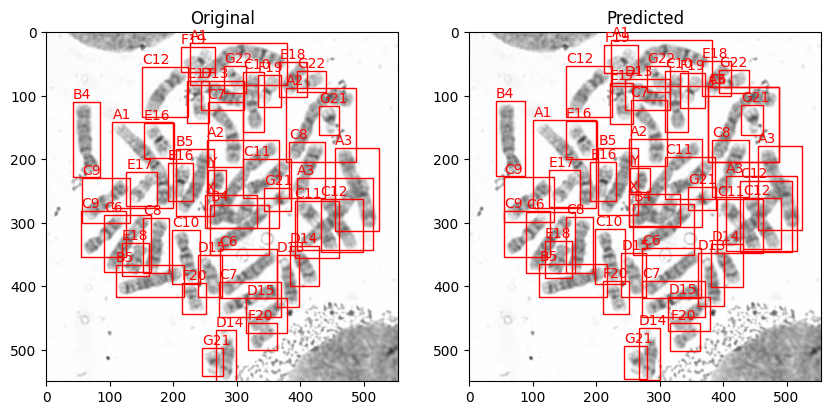

In [18]:
for pred in pred_ab:
    fig, ax = plt.subplots(1,2,figsize=(10,10))

    img = mpimg.imread(pred.path)
    ax[0].imshow(img)
    ax[1].imshow(img)

    id2c = {0: 'A1', 1: 'A2', 2: 'A3', 3: 'B4', 4: 'B5', 5: 'C10', 6: 'C11', 7: 'C12', 8: 'C6', 9: 'C7', 10: 'C8', 11: 'C9', 12: 'D13', 13: 'D14', 14: 'D15', 15: 'E16', 16: 'E17', 17: 'E18', 18: 'F19', 19: 'F20', 20: 'G21', 21: 'G22', 22: 'X', 23: 'Y'}

    
    #original bounding boxes
    w = img.shape[1]
    h = img.shape[0]
    f = open(pred.path.replace("images", "labels").replace(".jpg", ".txt"))
    for l in f:
        t = l.split(' ')
        x1 = float(t[1])
        w0 = float(t[3])
        y1 = float(t[2])
        h0 = float(t[4])
        ax[0].annotate(id2c[int(t[0])], ((x1-(w0/2))*w, ((y1 - (h0/2))*h)-5), color='red')
        ax[0].add_patch(patches.Rectangle(((x1-(w0/2))*w,(y1 - (h0/2))*h),w0*w,h0*h, linewidth=1, edgecolor='red', fill=False,))
        ax[0].set_title("Original")
    f.close()
    
    #predicted bounding boxes
    boxes = pred.boxes.xyxy.numpy()
    classes = pred.boxes.cls.numpy()
    for idx, box in enumerate(boxes):
        ax[1].annotate(id2c[int(classes[idx])], (box[0], box[1]-5), color="red")
        ax[1].add_patch(patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='red', fill=False))
        ax[1].set_title("Predicted")

    plt.show()

In [19]:
for pred in pred_ab:
    
    print("Original : ")
    f = open(pred.path.replace("images", "labels").replace(".jpg", ".txt"))
    classes = []
    for l in f:
        t = l.split(' ')
        classes.append(int(t[0]))
    f.close()
    print("Number of Chromosomes : " + str(len(classes)))
    diagnose(classes)
    
    classes1 = pred.boxes.cls.numpy()
    print("Predicted : ")
    print("Predicted Number of Chromosomes: " + str(len(classes1)))
    diagnose(classes1)
    
    print("\n")
    print("Mismatch : ", mismatch(classes, classes1))
    

Original : 
Number of Chromosomes : 47
Trisomy 21
Predicted : 
Predicted Number of Chromosomes: 49
Trisomy 21


Class A2:
Original: 2
Predicted: 1
Class A3:
Original: 2
Predicted: 3
Class C6:
Original: 2
Predicted: 3
Class C12:
Original: 2
Predicted: 3
Mismatch :  4


Test on different dataset

https://bioimlab.dei.unipd.it/Chromosome%20Data%20Set%204Seg.htm

Original Image

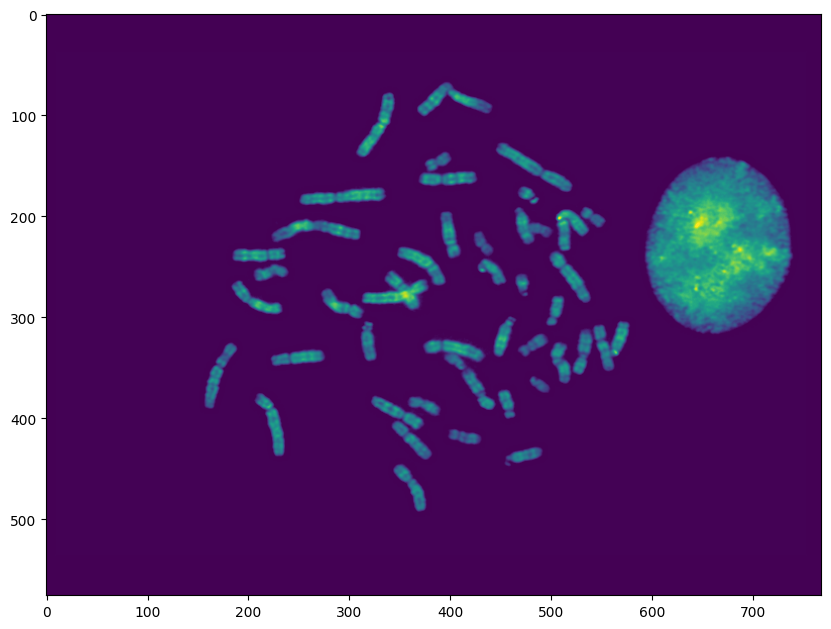

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

img = mpimg.imread("/kaggle/input/cell-image-library-for-ultralytics-yolo/original 1.bmp")
ax.imshow(img)

In [21]:
diff_pred = model("/kaggle/input/cell-image-library-for-ultralytics-yolo/original 1.bmp", conf=0.1)


image 1/1 /kaggle/input/cell-image-library-for-ultralytics-yolo/original 1.bmp: 608x800 1 A3, 1 C6, 1 C8, 1 Y, 295.2ms
Speed: 5.2ms preprocess, 295.2ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 800)


4


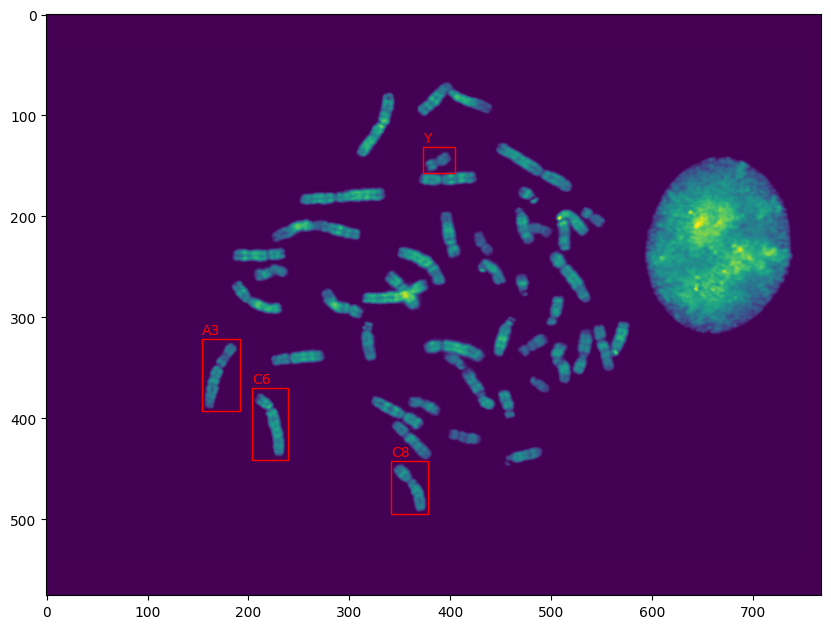

In [22]:
for pred in diff_pred:
    fig, ax = plt.subplots(1,1,figsize=(10,10))

    img = mpimg.imread(pred.path)
    ax.imshow(img)

    id2c = {0: 'A1', 1: 'A2', 2: 'A3', 3: 'B4', 4: 'B5', 5: 'C10', 6: 'C11', 7: 'C12', 8: 'C6', 9: 'C7', 10: 'C8', 11: 'C9', 12: 'D13', 13: 'D14', 14: 'D15', 15: 'E16', 16: 'E17', 17: 'E18', 18: 'F19', 19: 'F20', 20: 'G21', 21: 'G22', 22: 'X', 23: 'Y'}

    
    #predicted bounding boxes
    boxes = pred.boxes.xyxy.numpy()
    classes = pred.boxes.cls.numpy()
    print(len(boxes))
    for idx, box in enumerate(boxes):
        ax.annotate(id2c[int(classes[idx])], (box[0], box[1]-5), color="red")
        ax.add_patch(patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='red', fill=False))

    plt.show()